In [2]:
import scipy as sc
import pandas as pd
from scipy.stats import binom
import numpy as np
import seaborn as sns

pZ(z) = e^(−λ)*(λ^z)/z! . So Z = X +Y is Poisson, and we just  sum the z!
parameters.

if X1,X2,...,Xn are independent Poisson random variables with parameters λ1,λ2,...,λn, then  
X1 +X2 +...+Xn is a Poisson random variable too, with parameter λ1 +λ2 +...+λ

In [3]:
def sim_binomial(N, p, n_init_cells):
    x1=sum(np.random.binomial(N, p=p, size=n_init_cells))
    x2=N*n_init_cells - x1
    return [x1, x2]

def wrap_sim(n_sim=100):
    d = [] #dict()
    for init in [1, 10]:
        for p in np.arange(0.001,0.999, 0.005):
            for N in [10, 20, 50, 75, 100,10000]:
                for sim in range(n_sim):
                    #d[(p,N,sim)] = sim_binomial(N, p, n_init_cells)
                    d.append([p,N,sim, init] + sim_binomial(N, p, n_init_cells=init))
    return d

In [4]:
d = wrap_sim()
d

[[0.001, 10, 0, 1, 0, 10],
 [0.001, 10, 1, 1, 0, 10],
 [0.001, 10, 2, 1, 0, 10],
 [0.001, 10, 3, 1, 0, 10],
 [0.001, 10, 4, 1, 0, 10],
 [0.001, 10, 5, 1, 0, 10],
 [0.001, 10, 6, 1, 0, 10],
 [0.001, 10, 7, 1, 0, 10],
 [0.001, 10, 8, 1, 0, 10],
 [0.001, 10, 9, 1, 0, 10],
 [0.001, 10, 10, 1, 0, 10],
 [0.001, 10, 11, 1, 0, 10],
 [0.001, 10, 12, 1, 0, 10],
 [0.001, 10, 13, 1, 0, 10],
 [0.001, 10, 14, 1, 0, 10],
 [0.001, 10, 15, 1, 0, 10],
 [0.001, 10, 16, 1, 0, 10],
 [0.001, 10, 17, 1, 0, 10],
 [0.001, 10, 18, 1, 0, 10],
 [0.001, 10, 19, 1, 0, 10],
 [0.001, 10, 20, 1, 0, 10],
 [0.001, 10, 21, 1, 0, 10],
 [0.001, 10, 22, 1, 0, 10],
 [0.001, 10, 23, 1, 0, 10],
 [0.001, 10, 24, 1, 0, 10],
 [0.001, 10, 25, 1, 0, 10],
 [0.001, 10, 26, 1, 0, 10],
 [0.001, 10, 27, 1, 0, 10],
 [0.001, 10, 28, 1, 0, 10],
 [0.001, 10, 29, 1, 0, 10],
 [0.001, 10, 30, 1, 0, 10],
 [0.001, 10, 31, 1, 0, 10],
 [0.001, 10, 32, 1, 0, 10],
 [0.001, 10, 33, 1, 0, 10],
 [0.001, 10, 34, 1, 0, 10],
 [0.001, 10, 35, 1, 0, 10],
 [

In [6]:
df = pd.DataFrame(d, columns=["p","N","sim" , "starting_cells" , "l1", "l2" ])
df["fold"] = np.log2((df["l1"]+1)/(df["l2"]+1))
#df["p"]
df.sample(100)

,p,N,sim,starting_cells,l1,l2,fold
150068,0.251,10,68,10,23,77,-1.700440
162729,0.356,20,29,10,80,120,-0.579013
3303,0.026,75,3,1,2,73,-4.624491
179718,0.496,75,18,10,377,373,0.015348
22154,0.181,10000,54,1,1810,8190,-2.177253
...,...,...,...,...,...,...,...
17614,0.146,50,14,1,3,47,-3.584963
217255,0.811,10,55,10,82,18,2.127112
32495,0.271,10,95,1,6,4,0.485427
6447,0.051,100,47,1,6,94,-3.762501


In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter


In [8]:
min(df["fold"])

-10.965351411215556

In [9]:
max(df["fold"])

9.967226258835993

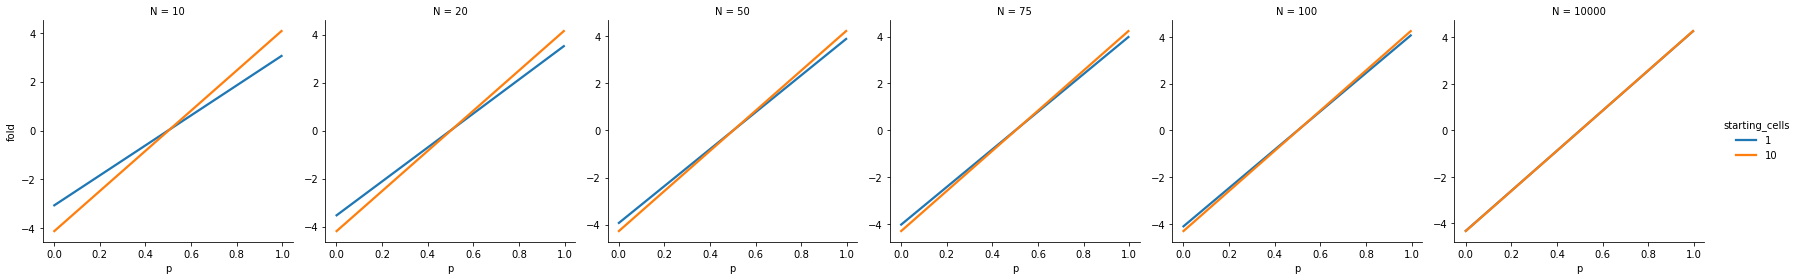

In [10]:
sns.lmplot(
    data=df, col="N", height=4,facet_kws={"sharey":False},
    x="p", y="fold", hue="starting_cells", scatter=False)#style="event",

# sns.lmplot(
#     data=df, col="N", row="starting_cells", height=4,facet_kws={"sharey":False},
#     x="p", y="fold", scatter=False)#style="event",


# sns.lmplot(
#     data=penguins, x="bill_length_mm", y="bill_depth_mm",
#     hue="species", col="sex", height=4,
# )
# g = sns.FacetGrid(data=df.sample(100), row="starting_cells", col="N", sharey=False, height=4)
# g.map_dataframe(sns.barplot, x="p", y="fold", order = np.sort(df["p"].unique()))


# for ax in g.axes.flatten():
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
#     ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    
# for ax in g.axes.flatten():
#     # set the ticks first
#     ax.set_xticks(np.arange(len(df["p"].unique()))[::10])
#     # set the labels
#     ax.set_xticklabels(np.sort(df["p"].unique())[::10], rotation=90)
#     ax.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))

In [ ]:
# g = sns.FacetGrid(data=df, row="starting_cells", col="N", sharey=False, sharex=False, height=4)
# g.map_dataframe(sns.scatterplot, x="l1", y="l2")


In [16]:
df_l = df.drop("fold", axis=1).melt(id_vars=["p", "N", "sim", "starting_cells"], var_name="lin", value_name="counts")
df_l

,p,N,sim,starting_cells,lin,counts
0,0.001,10,0,1,l1,0
1,0.001,10,1,1,l1,0
2,0.001,10,2,1,l1,0
3,0.001,10,3,1,l1,0
4,0.001,10,4,1,l1,0
...,...,...,...,...,...,...
479995,0.996,10000,95,10,l2,393
479996,0.996,10000,96,10,l2,424
479997,0.996,10000,97,10,l2,375
479998,0.996,10000,98,10,l2,407


In [ ]:
g = sns.FacetGrid(data=df_l, row="starting_cells", col="N", hue="lin", sharey=False, height=4)
g.map_dataframe(sns.stripplot, x="p", y="counts")
